In [25]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama
from IPython.display import Image

In [26]:
model=ChatOllama(model='qwen3:8b')

In [27]:
#create state 
class WriteBlogState(TypedDict,total=False):

    topic: str
    outline: str
    blog_post: str
    evaluation: str

In [28]:
# create node  for outline using topic
def create_outline(state:WriteBlogState)->WriteBlogState:
    topic=state['topic']
    promot=f"Create a small outline for a blog post on the topic: {topic}"
    response=model.invoke(promot)
    state['outline']=response.content
    return state

In [29]:
#create node for blog post using outline
def create_blog_post(state:WriteBlogState)->WriteBlogState:
    outline=state['outline']
    promot=f"Write a brief blog post based on the following outline: {outline}"
    response=model.invoke(promot)
    state['blog_post']=response.content
    return state


In [30]:
# evaluate by blog post from 1 to 10 and give feedback on how to improve it
def evaluate_blog_post(state:WriteBlogState)->WriteBlogState:
    blog_post=state['blog_post']
    promot=f"Evaluate the following blog post on a scale of 1 to 10 and provide feedback on how to improve it: {blog_post}"
    response=model.invoke(promot)
    state['evaluation']=response.content
    return state

In [31]:
graph=StateGraph(WriteBlogState)

graph.add_node("create_outline", create_outline)
graph.add_node("create_blog_post", create_blog_post)
graph.add_node("evaluate_blog_post", evaluate_blog_post)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog_post")
graph
graph.add_edge("create_blog_post", "evaluate_blog_post")
graph.add_edge("evaluate_blog_post", END)


In [32]:
workflow=graph.compile()

In [33]:
result=workflow.invoke({"topic":"The benefits of exercise for mental health"})


In [34]:
result

{'topic': 'The benefits of exercise for mental health',
 'outline': '**Blog Post Outline: The Benefits of Exercise for Mental Health**  \n\n**I. Introduction**  \n- Brief overview of the mind-body connection.  \n- Thesis: Exercise is a powerful tool for improving mental health.  \n\n**II. Reduces Stress and Anxiety**  \n- Explanation of how physical activity lowers cortisol levels.  \n- Role of endorphins in stress relief.  \n- Examples: Yoga, walking, or aerobic exercise.  \n\n**III. Alleviates Symptoms of Depression**  \n- Link between exercise and increased serotonin/endorphin production.  \n- Studies showing exercise as a complementary treatment for depression.  \n- Encouragement for consistency and gradual progression.  \n\n**IV. Boosts Mood and Emotional Resilience**  \n- How exercise promotes feelings of accomplishment and self-esteem.  \n- Impact on emotional regulation and coping mechanisms.  \n- Tips for finding enjoyable activities (e.g., dancing, team sports).  \n\n**V. Enh

In [37]:
print(result['evaluation'])

**Rating: 8/10**  
The blog post is well-structured, informative, and motivational, with clear sections that highlight the mental health benefits of exercise. It provides actionable advice and a positive tone, making it accessible to a broad audience. However, there are opportunities to enhance depth, engagement, and credibility.

---

### **Strengths**  
1. **Clear Structure**: Each section (e.g., stress reduction, depression alleviation) is concise and logically organized, making it easy to follow.  
2. **Practical Advice**: Tips like starting small, using apps, and pairing exercise with hobbies are actionable and relatable.  
3. **Positive Tone**: The encouraging language ("Your mind (and body) will thank you") fosters motivation without being overwhelming.  
4. **Accessibility**: Avoids jargon, making complex concepts (e.g., neurogenesis) understandable.  
5. **Visual Appeal**: Emojis and formatting (e.g., bullet points) add a friendly, modern touch.  

---

### **Areas for Improve

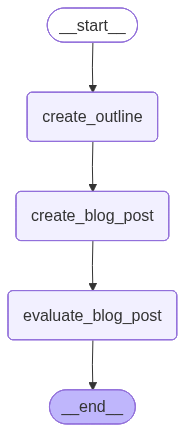

In [35]:
# print the graph
Image(workflow.get_graph().draw_mermaid_png())